In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [4]:
## creating dataset {creating dataset in this way doesn't require a standardization}
X, Y = make_classification(n_samples=1000,n_features=10,n_classes=3,random_state=42,n_informative=3)

In [5]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.30,random_state=42)

In [6]:
## model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr')
logistic.fit(X_train,Y_train)
y_pred = logistic.predict(X_test)

c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
# performance metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.6485714285714286
[[169  38  20]
 [ 90  79  60]
 [ 10  28 206]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       227
           1       0.54      0.34      0.42       229
           2       0.72      0.84      0.78       244

    accuracy                           0.65       700
   macro avg       0.63      0.64      0.63       700
weighted avg       0.63      0.65      0.63       700



In [ ]:
## Home work do hyperparameter tunning to get best result

### Logistic Regression for imbalanced dataset

In [ ]:
## means the in binary classification we have two dependent feature 1 and 0 and 1 is 900 and 0 is coming 100 means ration is 9:1 when
## datapoints are 1000 so this is called imbalanced dataset. and to solve this we using logistic regression with class_weight

In [8]:
from collections import Counter
from sklearn.datasets import make_classification

In [9]:
## imbalanced dataset
X,Y = make_classification(n_samples=10000,n_features=2,random_state=10,weights=[0.99],n_clusters_per_class=1,n_redundant=0)

In [11]:
Counter(Y)

Counter({np.int64(0): 9846, np.int64(1): 154})

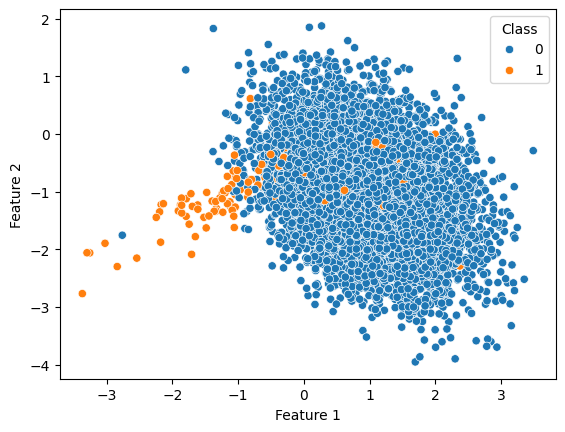

In [15]:

# Create a DataFrame for easier plotting
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = Y

# Create the scatter plot
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Class', data=df)
plt.show()

In [16]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.25,random_state=0)

In [18]:
## HyperParameter Tunning
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [19]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [20]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,scoring='accuracy',param_grid=params,cv=cv)

In [22]:
grid.fit(X_train,Y_train)

c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\StartingML\venv\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ di

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [23]:
grid.best_params_


{'C': 100,
 'class_weight': {0: 1, 1: 10},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [24]:
grid.best_score_

np.float64(0.9872)

In [25]:
y_pred = grid.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.9892
[[7372   12]
 [  69   47]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7384
           1       0.80      0.41      0.54       116

    accuracy                           0.99      7500
   macro avg       0.89      0.70      0.77      7500
weighted avg       0.99      0.99      0.99      7500

